#EDA & Pre-Processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/content/Training.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [4]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
data.duplicated().sum()

2000

Karena duplikasi data tidak pada kolom yang sama, maka duplikasi data tidak dihapus.

<Axes: title={'center': 'Correlation Between Variables'}>

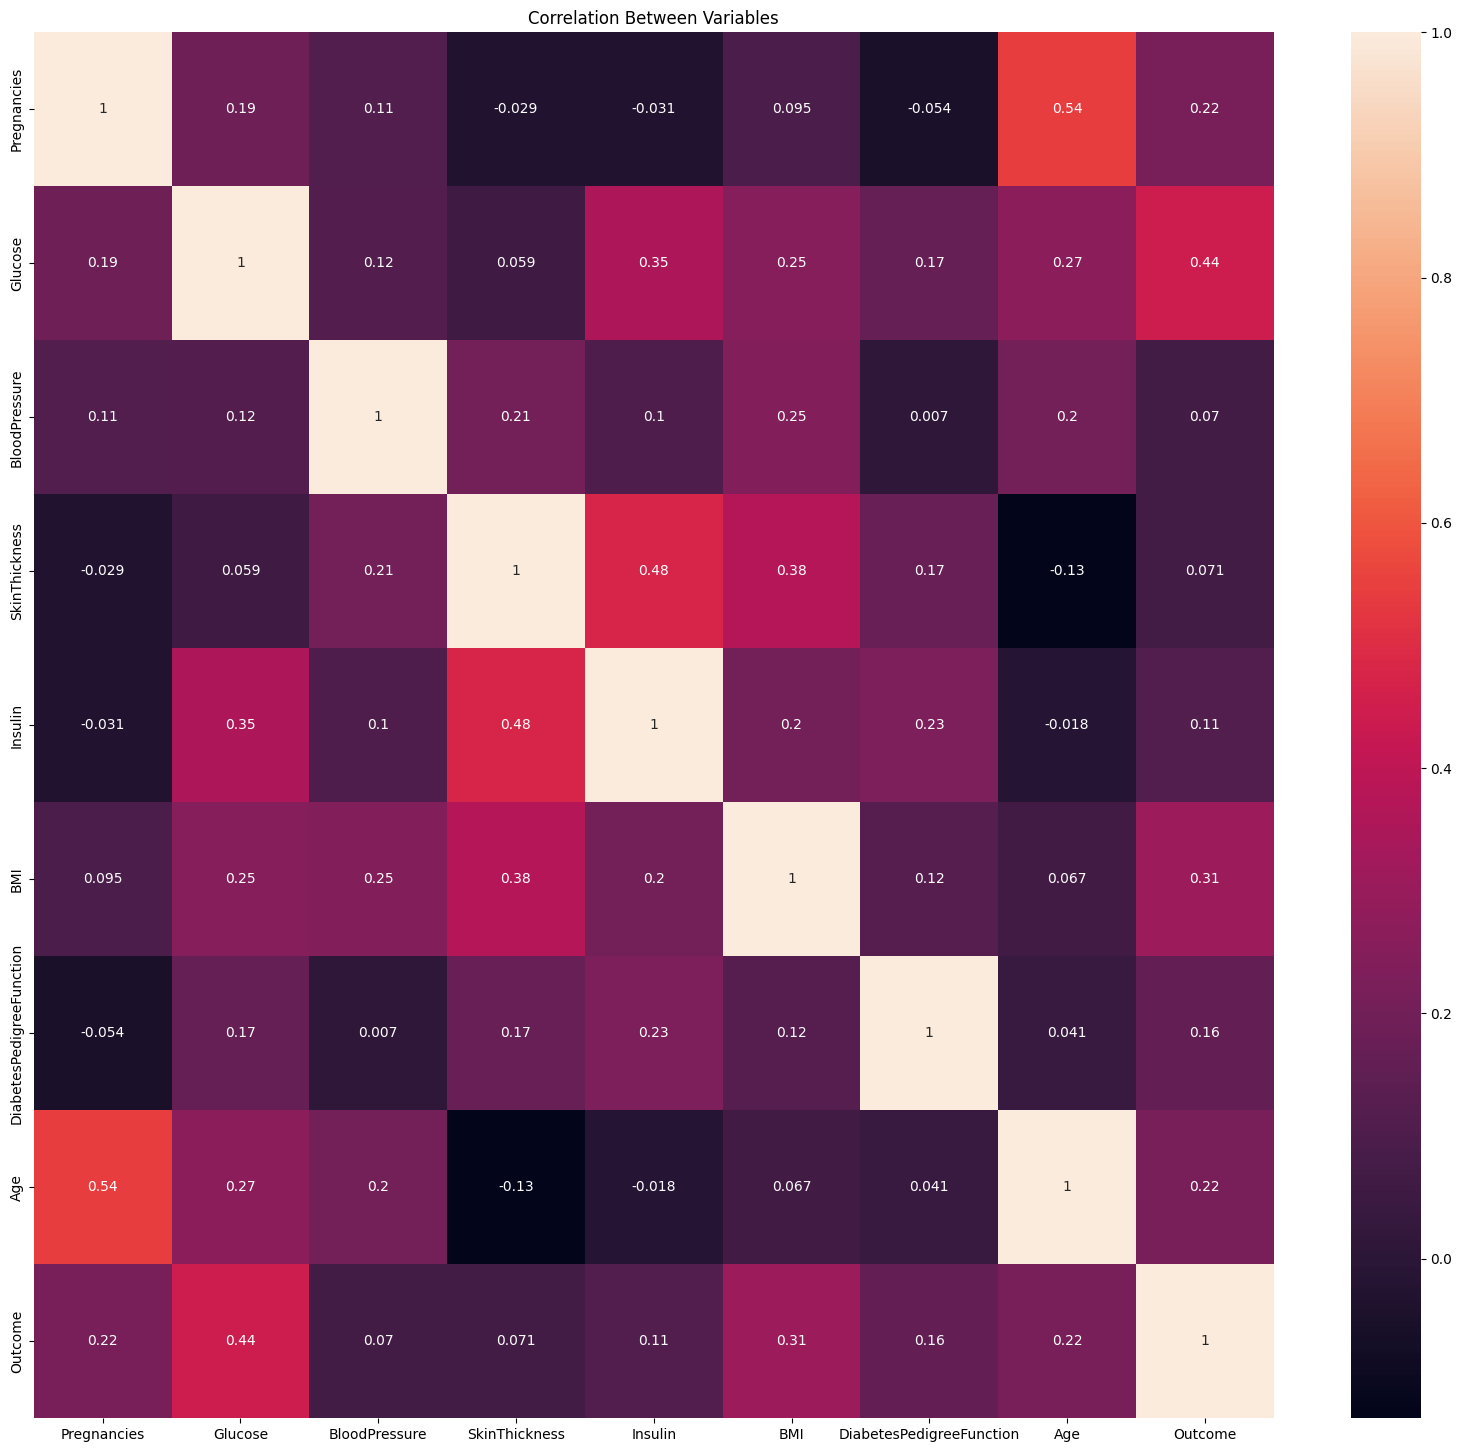

In [15]:
data_numeric = data.select_dtypes(include=[np.number])

plt.figure(figsize=(20,18))
plt.title('Correlation Between Variables')
sns.heatmap(data=data_numeric.corr(), annot=True)

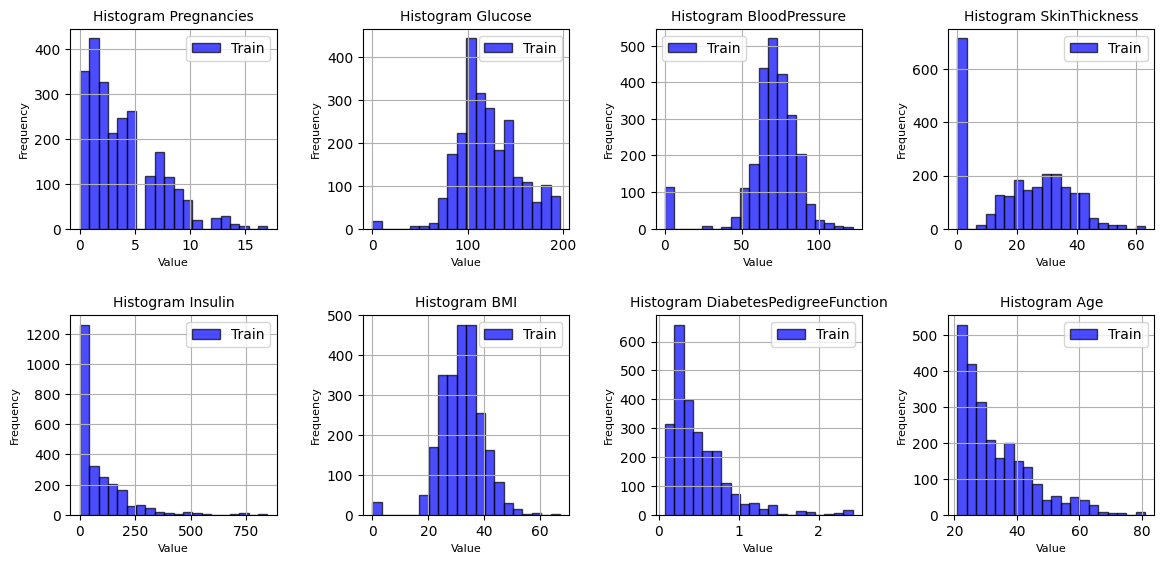

In [53]:
columns_to_plot = [col for col in data.columns if col != 'Outcome']
num_cols = len(columns_to_plot)
num_rows = (num_cols + 3) // 4

fig_width = 12
fig_height = 3 * num_rows

fig, axes = plt.subplots(num_rows, 4, figsize=(fig_width, fig_height))

for i, column in enumerate(columns_to_plot):
    ax = axes[i // 4, i % 4]
    ax.hist(data[column], bins=20, color='blue', alpha=0.7, edgecolor='black', label='Train')
    ax.set_title(f'Histogram {column}', fontsize=10)
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.legend()
    ax.grid(True)

for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(pad=2.0)
plt.show()

Melihat distribusi data menggunakan histogram

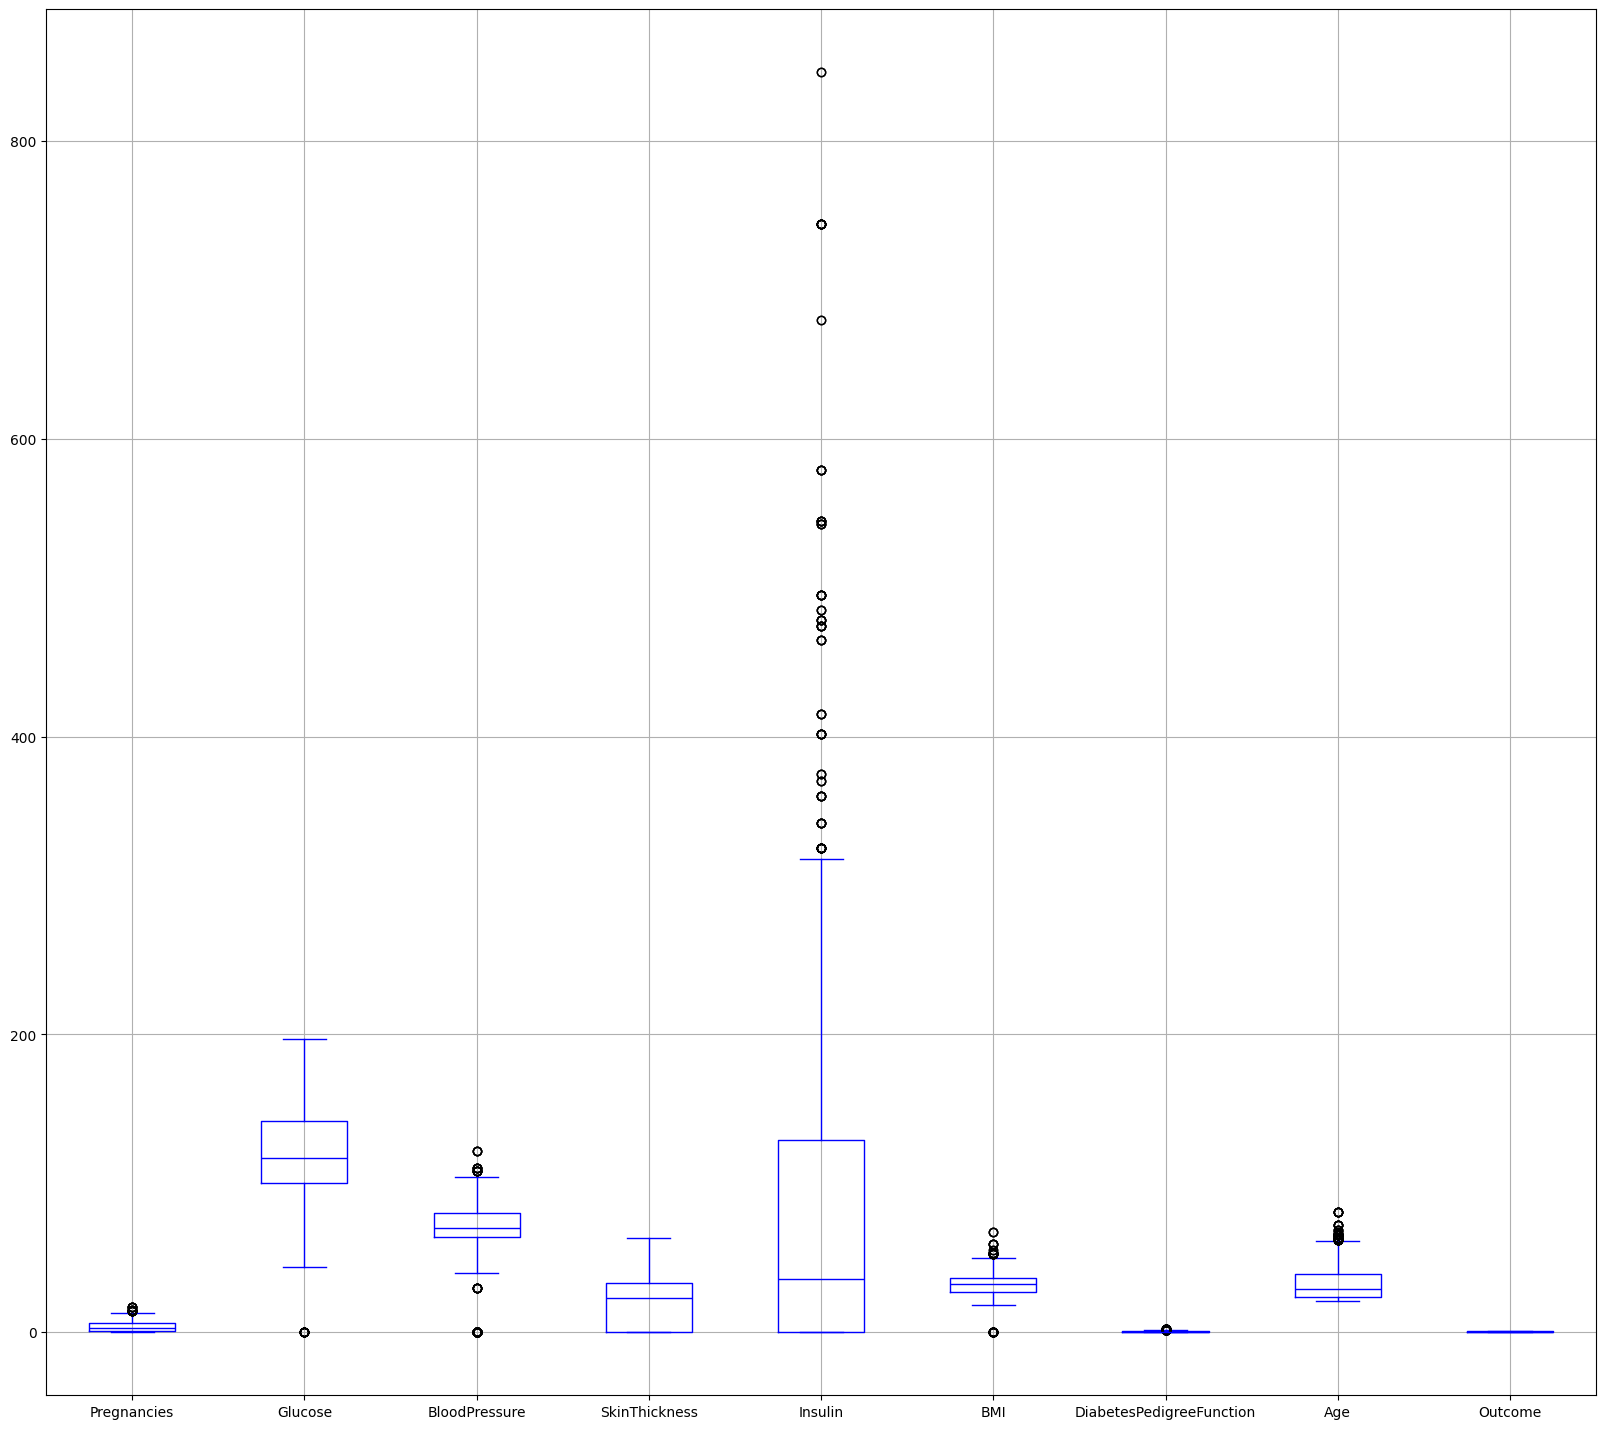

In [54]:
boxplot = data.boxplot(figsize=(20, 18), color='blue')

Melihat outlier dengan boxplot

In [46]:
def liat_outlier(data):
    columns = data.select_dtypes(include=['int', 'float']).columns
    hitung_outlier = {}
    for x in columns:
        Q1 = data[x].quantile(0.25)
        Q3 = data[x].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 -1.5*IQR
        upper_bound = Q3+1.5*IQR
        outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
        hitung_outlier[x] = len(outliers)

    return hitung_outlier

hitung_outlier = liat_outlier(data)
print(f'jumlah oulier di setiap kolom : {hitung_outlier}')

jumlah oulier di setiap kolom : {'Pregnancies': 21, 'Glucose': 17, 'BloodPressure': 140, 'SkinThickness': 0, 'Insulin': 97, 'BMI': 56, 'DiabetesPedigreeFunction': 103, 'Age': 63, 'Outcome': 0}


Menghitung jumlah outlier di setiap kolom. Ada beberapa kolom yang memiliki jumlah outlier yang cukup banyak. Maka handling outlier perlu dipertimbangkan.



In [47]:
def hapus_outlier(data):
    columns = data.select_dtypes(include=['int', 'float']).columns
    cleaned_data = data.copy()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) &
         (cleaned_data[column] <= upper_bound)]
    return cleaned_data

data_baru = hapus_outlier(data)
print(f'jumlah data setelah dihilangkan outlier : {len(data_baru)}')

jumlah data setelah dihilangkan outlier : 2027


Menghapus outlier sebanyak 433 data, dan copy ke dalam data frame baru yaitu data_baru.

In [48]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2027 non-null   int64  
 1   Glucose                   2027 non-null   int64  
 2   BloodPressure             2027 non-null   int64  
 3   SkinThickness             2027 non-null   int64  
 4   Insulin                   2027 non-null   int64  
 5   BMI                       2027 non-null   float64
 6   DiabetesPedigreeFunction  2027 non-null   float64
 7   Age                       2027 non-null   int64  
 8   Outcome                   2027 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 158.4 KB


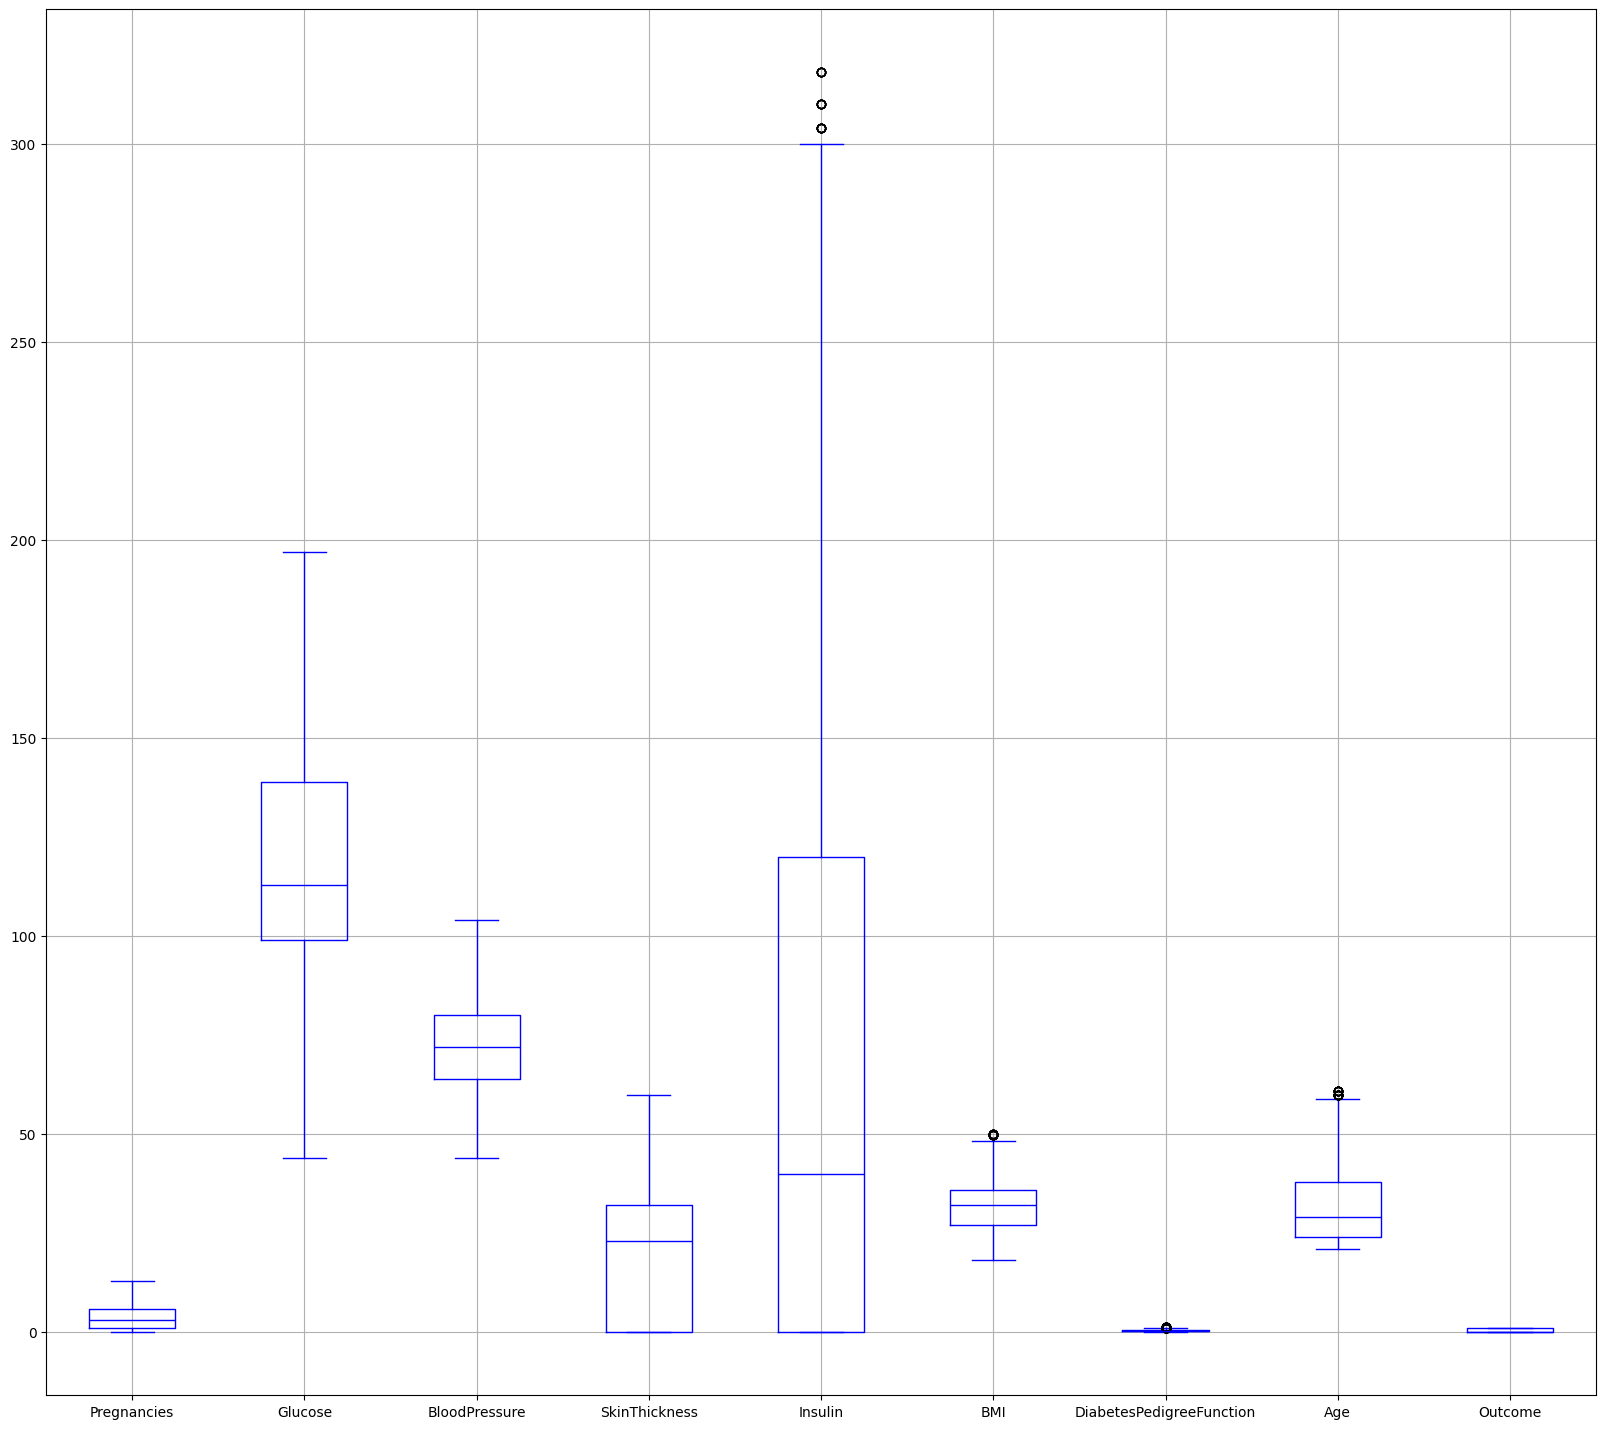

In [50]:
boxplot = data_baru.boxplot(figsize=(20, 18), color='blue')

boxplot pada data tanpa outlier

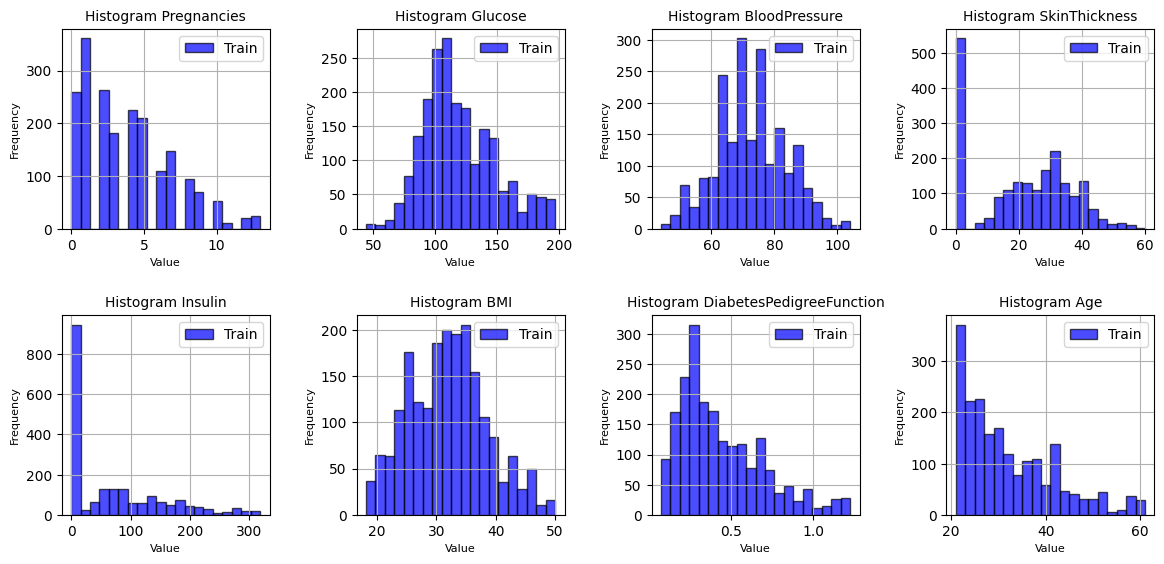

In [52]:
columns_to_plot = [col for col in data_baru.columns if col != 'Outcome']
num_cols = len(columns_to_plot)
num_rows = (num_cols + 3) // 4
fig_width = 12
fig_height = 3 * num_rows

fig, axes = plt.subplots(num_rows, 4, figsize=(fig_width, fig_height))

for i, column in enumerate(columns_to_plot):
    ax = axes[i // 4, i % 4]
    ax.hist(data_cleaned[column], bins=20, color='blue', alpha=0.7, edgecolor='black', label='Train')
    ax.set_title(f'Histogram {column}', fontsize=10)
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.legend()
    ax.grid(True)

for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(pad=2.0)
plt.show()

#Klasifikasi data_baru

In [56]:
from sklearn.model_selection import train_test_split
x = data_baru.drop(columns='Outcome')
y = data_baru.Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
(x_train.shape[0]/len(x))*100, (x_test.shape[0]/len(x))*100

(79.97039960532807, 20.029600394671927)

In [20]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1551,1,95,74,21,73,25.9,0.673,36
1196,2,71,70,27,0,28.0,0.586,22
1872,0,146,70,0,0,37.9,0.334,28
733,4,146,85,27,100,28.9,0.189,27
1560,0,117,80,31,53,45.2,0.089,24
...,...,...,...,...,...,...,...,...
1636,10,122,78,31,0,27.6,0.512,45
510,6,80,66,30,0,26.2,0.313,41
828,7,159,64,0,0,27.4,0.294,40
1880,0,165,76,43,255,47.9,0.259,26


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(f'confusion matrix :{confusion_matrix(y_test, y_pred_knn)}')
print(f'accuracy score :{accuracy_score(y_test, y_pred_knn)}')
print(f'recall score :{recall_score(y_test, y_pred_knn)}')
print(f'precision score :{precision_score(y_test, y_pred_knn)}')

confusion matrix :[[259   3]
 [  3 141]]
accuracy_score :0.9852216748768473
recall_score :0.9791666666666666
precision_score :0.9791666666666666


<Axes: >

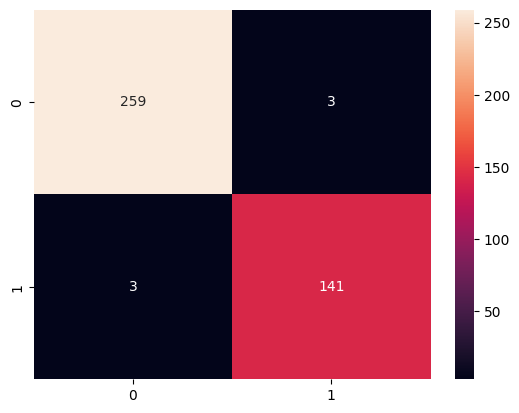

In [25]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')

In [62]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(f'confusion matrix :{confusion_matrix(y_test, y_pred_nb)}')
print(f'accuracy score :{accuracy_score(y_test, y_pred_nb)}')
print(f'recall score :{recall_score(y_test, y_pred_nb)}')
print(f'precision score :{precision_score(y_test, y_pred_nb)}')


confusion matrix :[[201  61]
 [ 61  83]]
accuracy_score :0.6995073891625616
recall_score :0.5763888888888888
precision_score :0.5763888888888888


<Axes: >

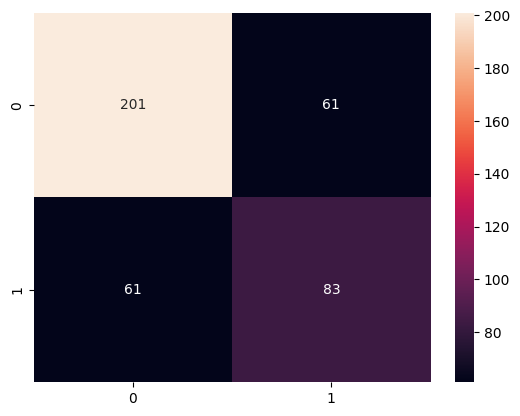

In [27]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d')

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(f'confusion matrix :{confusion_matrix(y_test, y_pred_dt)}')
print(f'accuracy score :{accuracy_score(y_test, y_pred_dt)}')
print(f'recall score :{recall_score(y_test, y_pred_dt)}')
print(f'precision score :{precision_score(y_test, y_pred_dt)}')

confusion matrix :[[260   2]
 [  1 143]]
accuracy score :0.9926108374384236
recall score :0.9930555555555556
precision score :0.9862068965517241


<Axes: >

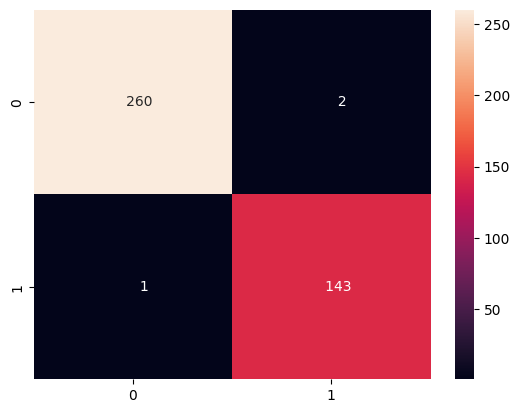

In [29]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='6')

Dari vaccuracy score, recall score, precision score ketiga algortima, dapat disimpulkan decision tree adalah algoritma paling baik.

#Klasifikasi data tanpa dilakukan handling outlier

In [31]:
x = data.drop(columns='Outcome')
y = data.Outcome

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
(x_train.shape[0]/len(x))*100, (x_test.shape[0]/len(x))*100

(80.0, 20.0)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(f'confusion matrix :{confusion_matrix(y_test, y_pred_knn)}')
print(f'accuracy_score :{accuracy_score(y_test, y_pred_knn)}')
print(f'recall score :{recall_score(y_test, y_pred_knn)}')
print(f'precision score :{precision_score(y_test, y_pred_knn)}')

confusion matrix :[[299   6]
 [  1 186]]
accuracy_score :0.9857723577235772
recall score :0.9946524064171123
precision score :0.96875


In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(f'confusion matrix :{confusion_matrix(y_test, y_pred_nb)}')
print(f'accuracy_score :{accuracy_score(y_test, y_pred_nb)}')
print(f'recall score :{recall_score(y_test, y_pred_nb)}')
print(f'precision score :{precision_score(y_test, y_pred_nb)}')

confusion matrix :[[245  60]
 [ 79 108]]
accuracy_score :0.717479674796748
recall score :0.5775401069518716
precision score :0.6428571428571429


Terdapat perbedaan nilai matriks evaluasi accuracy score, recall dan precision jika dibandingkan dengan databaru. Data yang tidak diberlakukan handling outlier terlihat lebih baik. Dan, algoritma paling baik yang digunakan adalah decision tree